<a href="https://colab.research.google.com/github/geoffwoollard/learn_cryoem_math/blob/master/nb/pseudo_atoms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal
* explore prody's density map --> pseudo atoms from 
  * bechmark run time
  * explore how many pseudo atoms are needed (100s, 1000s?)

# Setup

In [2]:
!pip install prody
import prody

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def doplt(arr): return(plt.imshow(arr,cmap='gray'))

In [4]:
!wget https://raw.githubusercontent.com/geoffwoollard/learn_cryoem_math/master/src/gauss_forward_model.py
!wget https://raw.githubusercontent.com/geoffwoollard/learn_cryoem_math/master/src/coords.py
import gauss_forward_model, coords

--2021-04-17 15:58:54--  https://raw.githubusercontent.com/geoffwoollard/learn_cryoem_math/master/src/gauss_forward_model.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2148 (2.1K) [text/plain]
Saving to: ‘gauss_forward_model.py.1’

gauss_forward_model 100%[===================>]   2.10K  --.-KB/s    in 0s      

2021-04-17 15:58:54 (40.8 MB/s) - ‘gauss_forward_model.py.1’ saved [2148/2148]

--2021-04-17 15:58:54--  https://raw.githubusercontent.com/geoffwoollard/learn_cryoem_math/master/src/coords.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respo

# Prody pseudo atoms
* See http://prody.csb.pitt.edu/tutorials/cryoem_tutorial/em_analysis.html
* `prody.parseEMD` loads a map and assigns pseudo atoms.

In [ ]:
emdb_id = '1961'
emd = prody.parseEMD(emdb_id, cutoff=1.2, n_nodes=500)

In [83]:
atoms = emd.getCoords().T

In [50]:
atoms.max(1), atoms.min(1)

(array([75.39844685, 72.88179198, 80.04517967]),
 array([-75.2493058 , -72.16843165, -74.55810026]))

In [51]:
N_range = atoms.max() - atoms.min() # range
N_range

155.2944854724936

In [68]:
N_dist = N_range*1.2
psize = 1.45
N  = int(2*((N_dist/psize) // 2))
N

128

Let's take a look at how well the atoms are getting the overall shape. We can scale the atom positions (in A) to pixels by dividing the distances by the pixel size. N is the number of pixels. We are working in "pixel units".

In [69]:
coords_1d = np.arange(-N//2,N//2)
xyz = coords.coords_n_by_d(coords_1d,d=3)
xy = coords.coords_n_by_d(coords_1d,d=2)

In [70]:
gauss_forward_model.make_map_2d = make_map_2d

Text(0.5, 1.0, 'EMDB 1961 | 1000 pseudo-atoms | 128 pix | 1.45 A/pix')

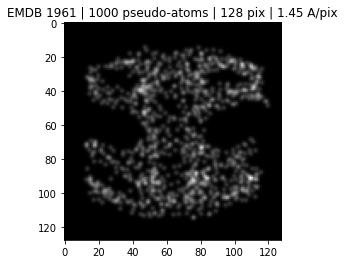

In [78]:
proj = gauss_forward_model.make_map_2d(atoms[[1,2]]/psize,xy,N,sigma=1)
ax = doplt(proj)
plt.title

# Benchmark `n_nodes`
 The run time increases from 2 s to 1.5 min for 25-1500 n_nodes

In [88]:
atoms_list=[]
n_nodes_list = [25,50,75,125,250,500,750,1000,1500]
for n_nodes in n_nodes_list:
  %time emd = prody.parseEMD(emdb_id, cutoff=1.2, n_nodes=n_nodes)
  atoms = emd.getCoords().T
  atoms_list.append(atoms)

@> Building coordinates from electron density map. This may take a while.
@> 25 pseudoatoms were fitted in 0.07s.


CPU times: user 2.07 s, sys: 47.5 ms, total: 2.11 s
Wall time: 2.07 s


@> Building coordinates from electron density map. This may take a while.
@> 50 pseudoatoms were fitted in 0.19s.
@> Building coordinates from electron density map. This may take a while.


CPU times: user 2.18 s, sys: 59.5 ms, total: 2.24 s
Wall time: 2.2 s


@> 75 pseudoatoms were fitted in 0.37s.
@> Building coordinates from electron density map. This may take a while.


CPU times: user 2.36 s, sys: 43.7 ms, total: 2.4 s
Wall time: 2.34 s


@> 125 pseudoatoms were fitted in 0.87s.


CPU times: user 2.84 s, sys: 49.5 ms, total: 2.89 s
Wall time: 2.83 s


@> Building coordinates from electron density map. This may take a while.
@> 250 pseudoatoms were fitted in 3.05s.


CPU times: user 5.02 s, sys: 70.3 ms, total: 5.1 s
Wall time: 5.03 s


@> Building coordinates from electron density map. This may take a while.
@> 500 pseudoatoms were fitted in 11.58s.


CPU times: user 13.5 s, sys: 75.5 ms, total: 13.6 s
Wall time: 13.6 s


@> Building coordinates from electron density map. This may take a while.
@> 750 pseudoatoms were fitted in 25.96s.


CPU times: user 27.9 s, sys: 134 ms, total: 28 s
Wall time: 28 s


@> Building coordinates from electron density map. This may take a while.
@> 1000 pseudoatoms were fitted in 46.55s.


CPU times: user 48.4 s, sys: 263 ms, total: 48.6 s
Wall time: 48.5 s


@> Building coordinates from electron density map. This may take a while.
@> 1500 pseudoatoms were fitted in 103.90s.


CPU times: user 1min 45s, sys: 491 ms, total: 1min 46s
Wall time: 1min 45s


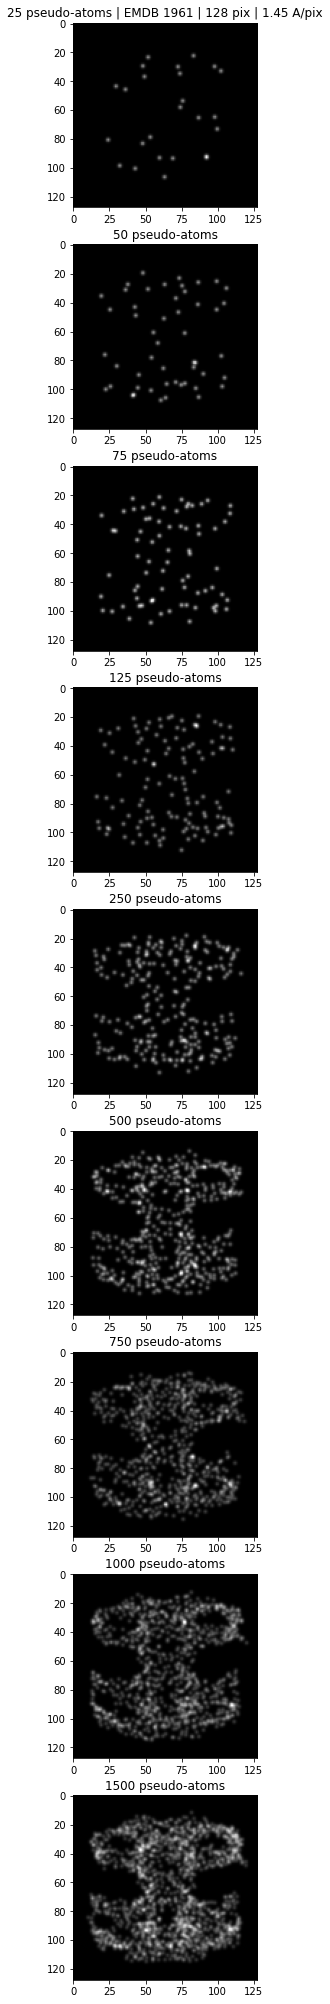

In [90]:
fig,axes = plt.subplots(nrows=len(n_nodes_list),figsize=(36, 4*len(n_nodes_list)))
for idx, N_crop in enumerate(n_nodes_list):
  atoms = atoms_list[idx]
  proj = gauss_forward_model.make_map_2d(atoms[[1,2]]/psize,xy,N,sigma=1)
  axes[idx].imshow(proj,cmap='gray')
  if idx == 0:
    title_str = '%i pseudo-atoms | EMDB %s | %i pix | %.2f A/pix' %(atoms.shape[1],emdb_id,N,psize)
  else:
    title_str = '%i pseudo-atoms' %(atoms.shape[1])
  axes[idx].set_title(title_str)